In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os

from preprocessing.scripts import split_movie_script
from testing.vader import model as vadar
from movie_sentiment_plot import movie_sentiment_plot

In [2]:
movie_list = os.listdir('./raw_data/screenplay_data/data/raw_texts/raw_texts')

In [3]:
#moving average
def moving_average(data, window_size):
    weights = np.repeat(1.0, window_size) / window_size
    moving_avg = np.convolve(data, weights, 'valid')
    return moving_avg

In [4]:
# Given the parameters for each movie title, calculates the text chunk scores
def movie_raw_score(movie_title, typer, pad, lower, group_chunk):
    
    movie_script_splitted = split_movie_script(movie_title, typer=typer, \
                                               pad=pad, lower=lower, rm_stopwords=False, \
                                               lemmatize=False)
    
    movie_script_scored = vadar(movie_script_splitted, group_chunk)
    
    return movie_script_scored

In [5]:
#Given a movie name and a list of parameters, plot different movie arcs

def arc_grid_search(movie_title):
    # plots the arc with different values for: sentence, pad, window_size for moving average
    
    lower = [False, True]
    pad = [5,50]
    group_chunk = [1,10]
    window_size = [10,50]
    
    # Making all combinations: 
    unique_combinations = []
    for k in range(len(lower)):
        for i in range(len(pad)):
            for j in range(len(window_size)):
                for l in range(len(group_chunk)):
                    unique_combinations.append((lower[k],pad[i],window_size[j],group_chunk[l]))


    
    rows = len(pad) * len(window_size) * len(lower) * len(group_chunk)
    fig, axs = plt.subplots(rows,2, figsize=(10, 45))
    
    # with sentence =True 
    for i in range(len(unique_combinations)):
        
        lower = unique_combinations[i][0]
        pad = unique_combinations[i][1]
        window_size = unique_combinations[i][2]
        group_chunk= unique_combinations[i][3]
        
                                    
        raw_score = movie_raw_score(movie_title, typer='sentence', pad=pad, lower=lower, group_chunk=group_chunk)
        moving_avg = moving_average(raw_score['compound'], window_size)
        print(f'step {i} - Sentence completed')
        axs[i,0].plot(moving_avg)
        axs[i,0].set_title(f'p={pad}, ws= {window_size},g={group_chunk},l={lower}', fontsize=8)
        
        
    
    # with sentence = False
    for i in range(len(unique_combinations)):
        
        lower = unique_combinations[i][0]
        pad = unique_combinations[i][1]
        window_size = unique_combinations[i][2]
        group_chunk= unique_combinations[i][3]
        
                                    
        raw_score = movie_raw_score(movie_title, typer='words', pad=pad, lower=lower, group_chunk=group_chunk)
        moving_avg = moving_average(raw_score['compound'], window_size)  
        print(f'step {i} - Words completed')
        axs[i,1].plot(moving_avg)
        axs[i,1].set_title(f'p={pad}, ws= {window_size},g={group_chunk},l={lower}', fontsize=8)


step 0 - Sentence completed
step 1 - Sentence completed
step 2 - Sentence completed
step 3 - Sentence completed
step 4 - Sentence completed
step 5 - Sentence completed
step 6 - Sentence completed
step 7 - Sentence completed
step 8 - Sentence completed
step 9 - Sentence completed
step 10 - Sentence completed
step 11 - Sentence completed
step 12 - Sentence completed
step 13 - Sentence completed
step 14 - Sentence completed
step 15 - Sentence completed
step 0 - Words completed
step 1 - Words completed
step 2 - Words completed
step 3 - Words completed
step 4 - Words completed
step 5 - Words completed
step 6 - Words completed
step 7 - Words completed
step 8 - Words completed
step 9 - Words completed
step 10 - Words completed
step 11 - Words completed
step 12 - Words completed
step 13 - Words completed
step 14 - Words completed
step 15 - Words completed


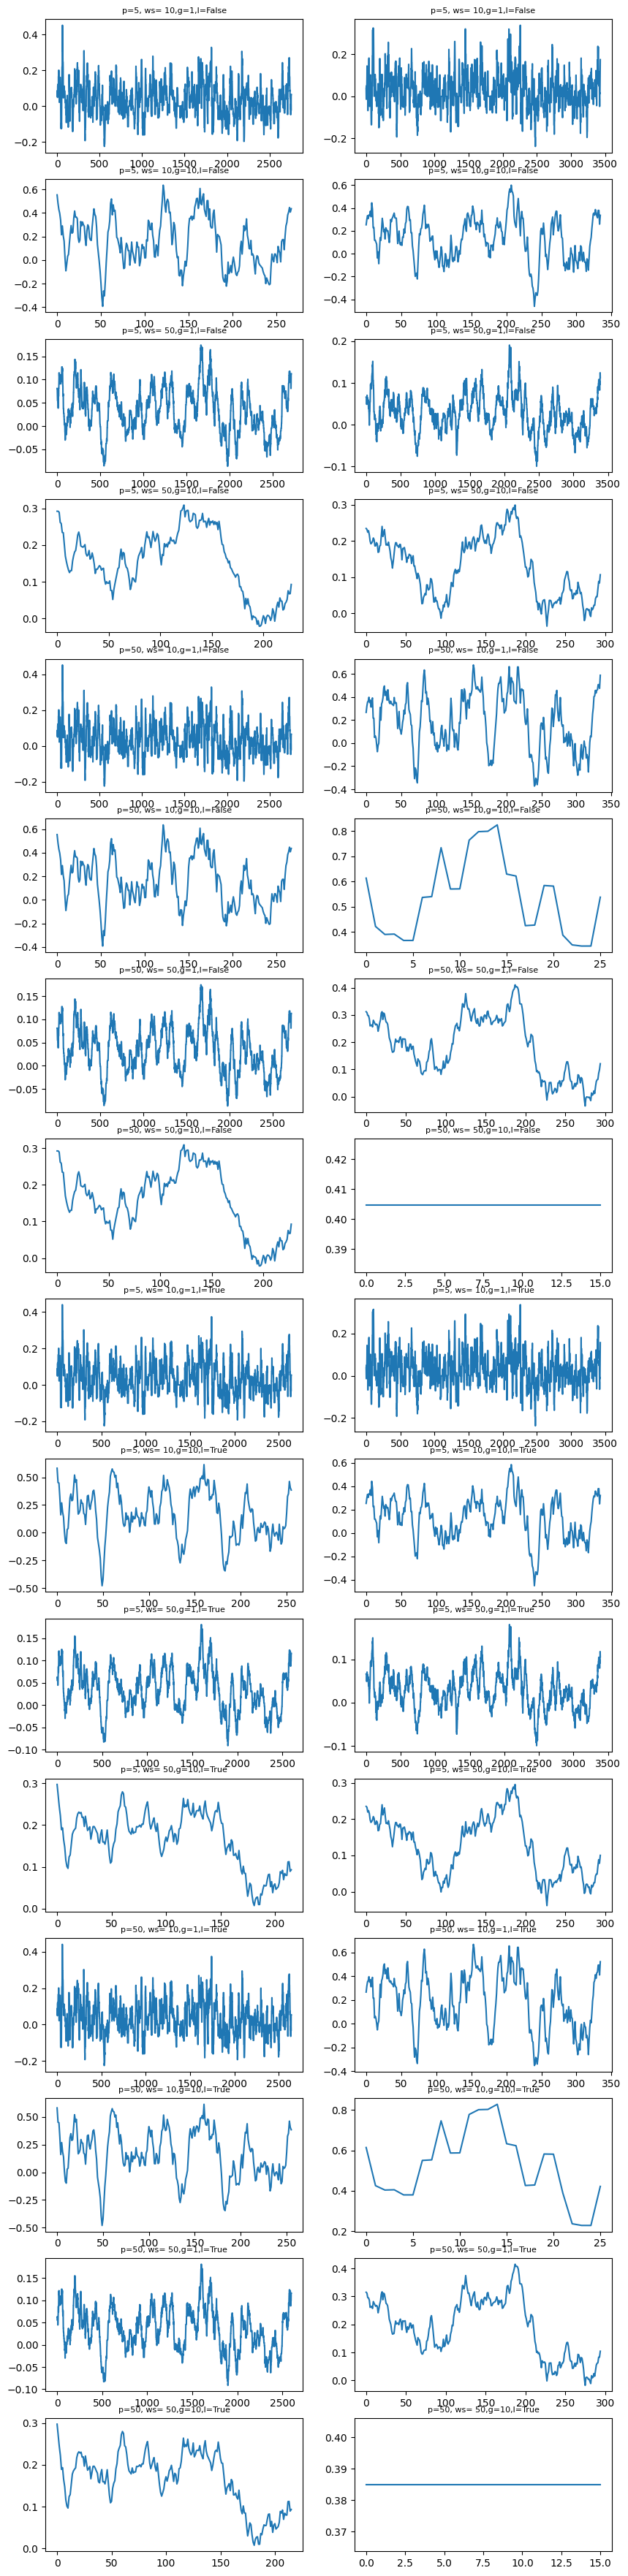

In [6]:
arc_grid_search('Up_1049413.txt')

step 0 - Sentence completed
step 1 - Sentence completed
step 2 - Sentence completed
step 3 - Sentence completed
step 4 - Sentence completed
step 5 - Sentence completed
step 6 - Sentence completed
step 7 - Sentence completed
step 8 - Sentence completed
step 9 - Sentence completed
step 10 - Sentence completed
step 11 - Sentence completed
step 12 - Sentence completed
step 13 - Sentence completed
step 14 - Sentence completed
step 15 - Sentence completed
step 0 - Words completed
step 1 - Words completed
step 2 - Words completed
step 3 - Words completed
step 4 - Words completed
step 5 - Words completed
step 6 - Words completed
step 7 - Words completed
step 8 - Words completed
step 9 - Words completed
step 10 - Words completed
step 11 - Words completed
step 12 - Words completed
step 13 - Words completed
step 14 - Words completed
step 15 - Words completed


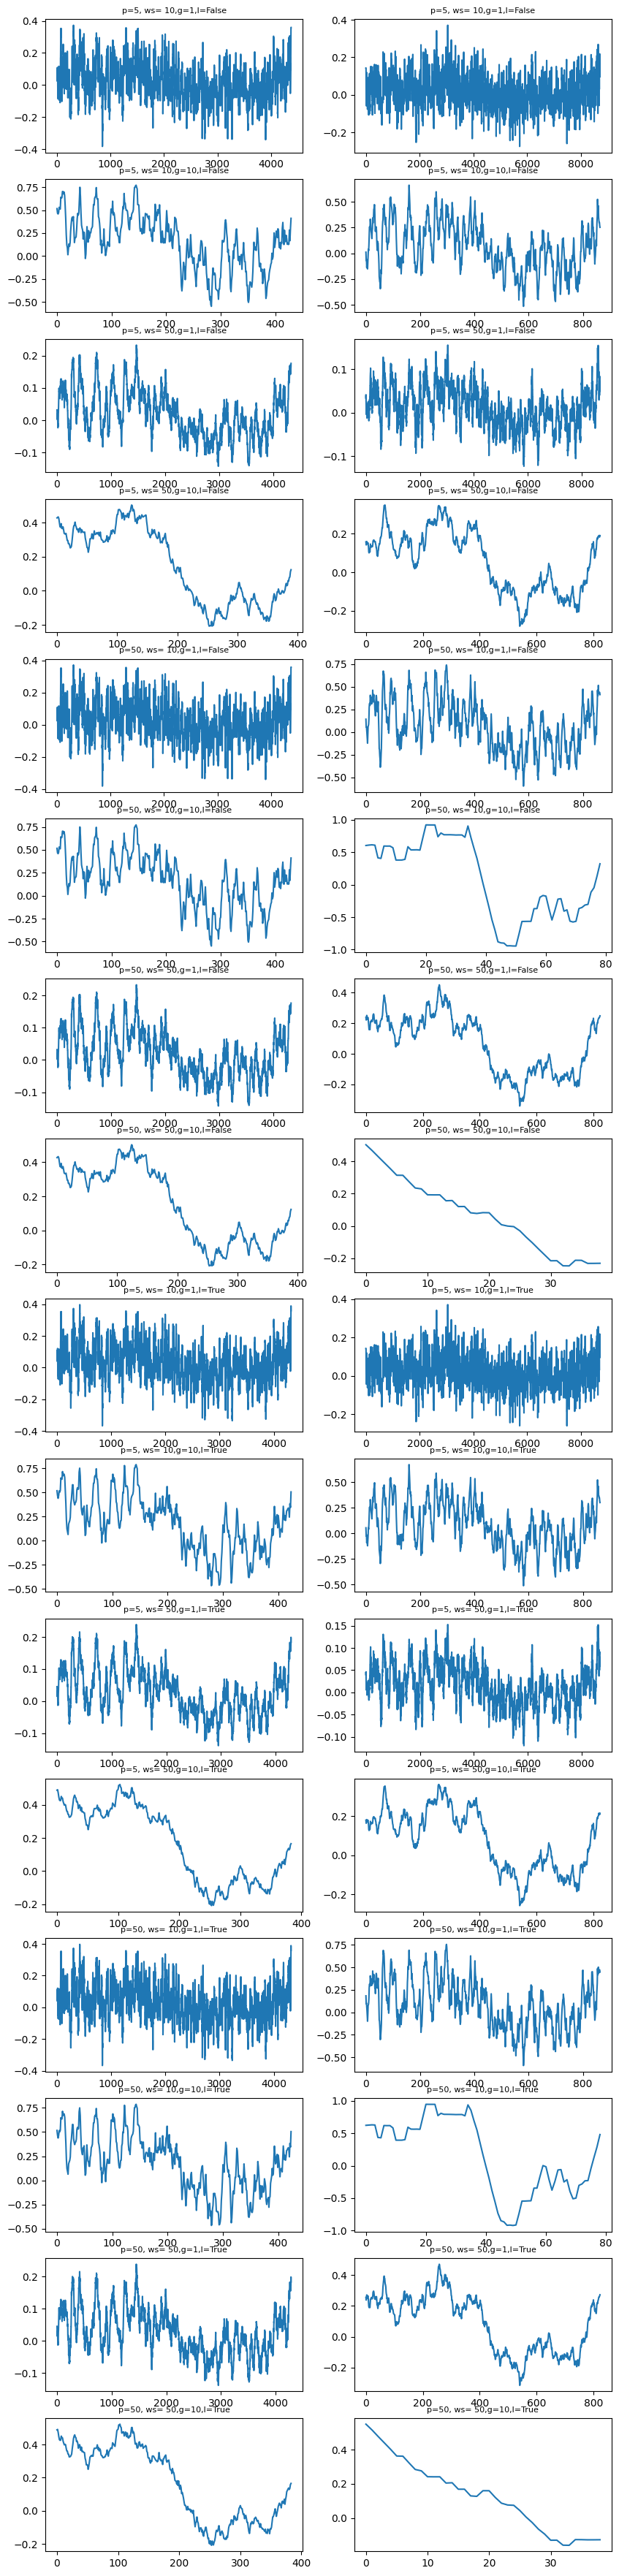

In [8]:
arc_grid_search('Titanic_0120338.txt')

step 0 - Sentence completed
step 1 - Sentence completed
step 2 - Sentence completed
step 3 - Sentence completed
step 4 - Sentence completed
step 5 - Sentence completed
step 6 - Sentence completed
step 7 - Sentence completed
step 8 - Sentence completed
step 9 - Sentence completed
step 10 - Sentence completed
step 11 - Sentence completed
step 12 - Sentence completed
step 13 - Sentence completed
step 14 - Sentence completed
step 15 - Sentence completed
step 0 - Words completed
step 1 - Words completed
step 2 - Words completed
step 3 - Words completed
step 4 - Words completed
step 5 - Words completed
step 6 - Words completed
step 7 - Words completed
step 8 - Words completed
step 9 - Words completed
step 10 - Words completed
step 11 - Words completed
step 12 - Words completed
step 13 - Words completed
step 14 - Words completed
step 15 - Words completed


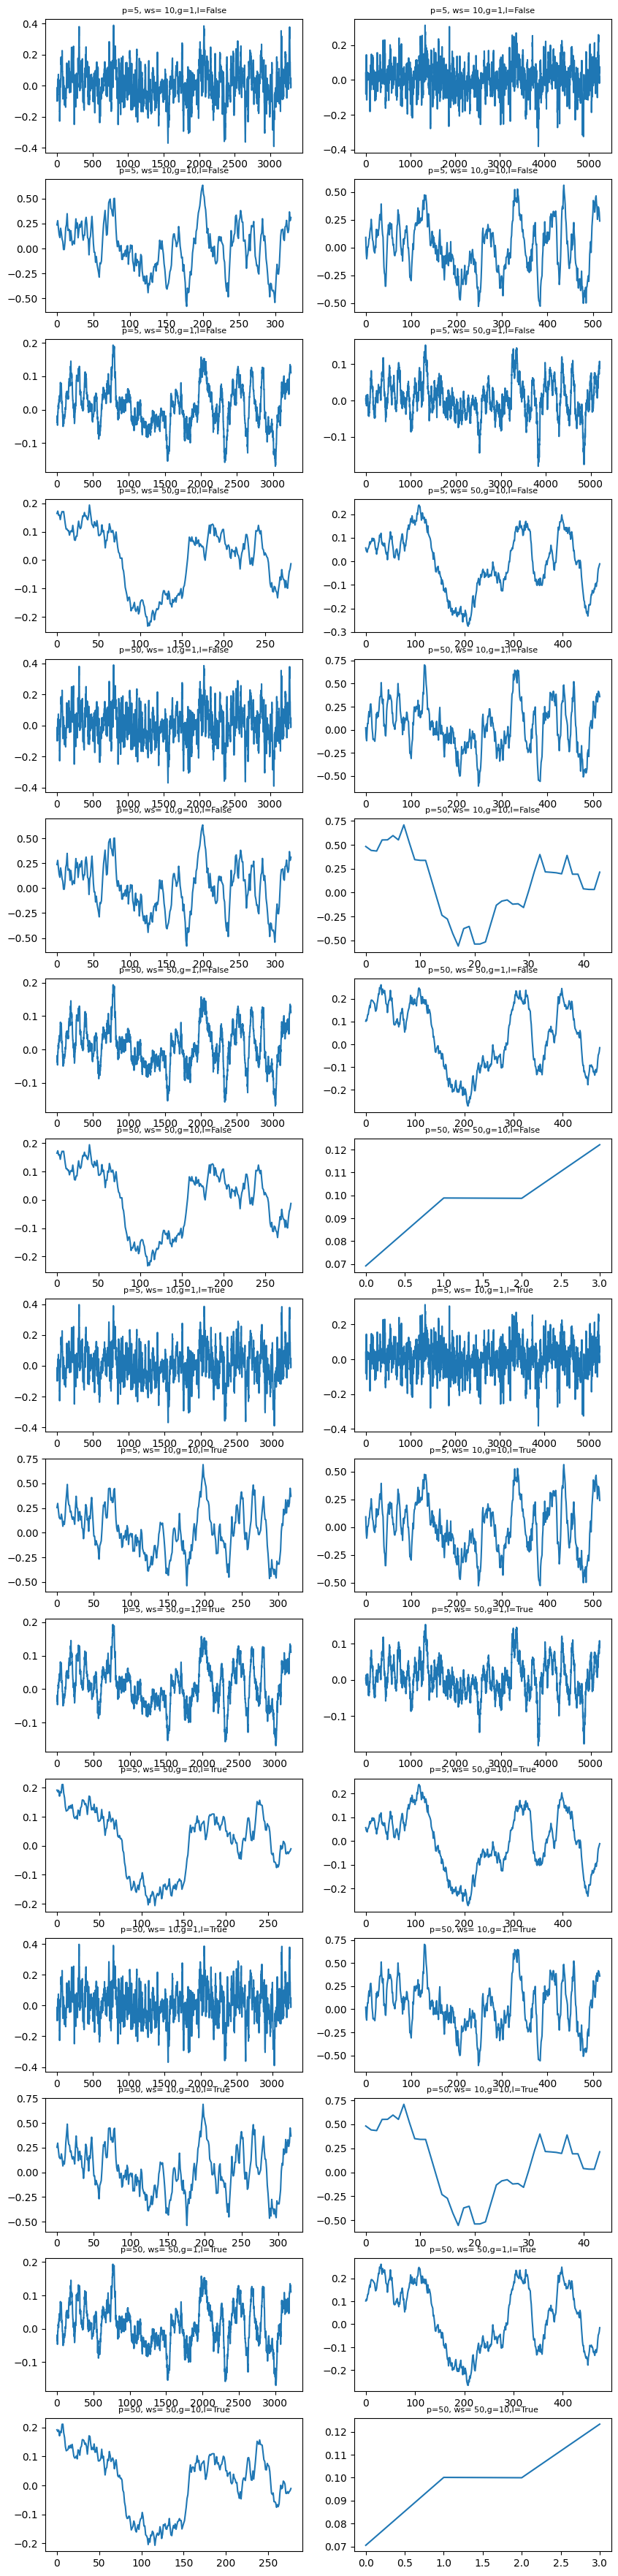

In [9]:
arc_grid_search('V for Vendetta_0434409.txt')

step 0 - Sentence completed
step 1 - Sentence completed
step 2 - Sentence completed
step 3 - Sentence completed
step 4 - Sentence completed
step 5 - Sentence completed
step 6 - Sentence completed
step 7 - Sentence completed
step 8 - Sentence completed
step 9 - Sentence completed
step 10 - Sentence completed
step 11 - Sentence completed
step 12 - Sentence completed
step 13 - Sentence completed
step 14 - Sentence completed
step 15 - Sentence completed
step 0 - Words completed
step 1 - Words completed
step 2 - Words completed
step 3 - Words completed
step 4 - Words completed
step 5 - Words completed
step 6 - Words completed
step 7 - Words completed
step 8 - Words completed
step 9 - Words completed
step 10 - Words completed
step 11 - Words completed
step 12 - Words completed
step 13 - Words completed
step 14 - Words completed
step 15 - Words completed


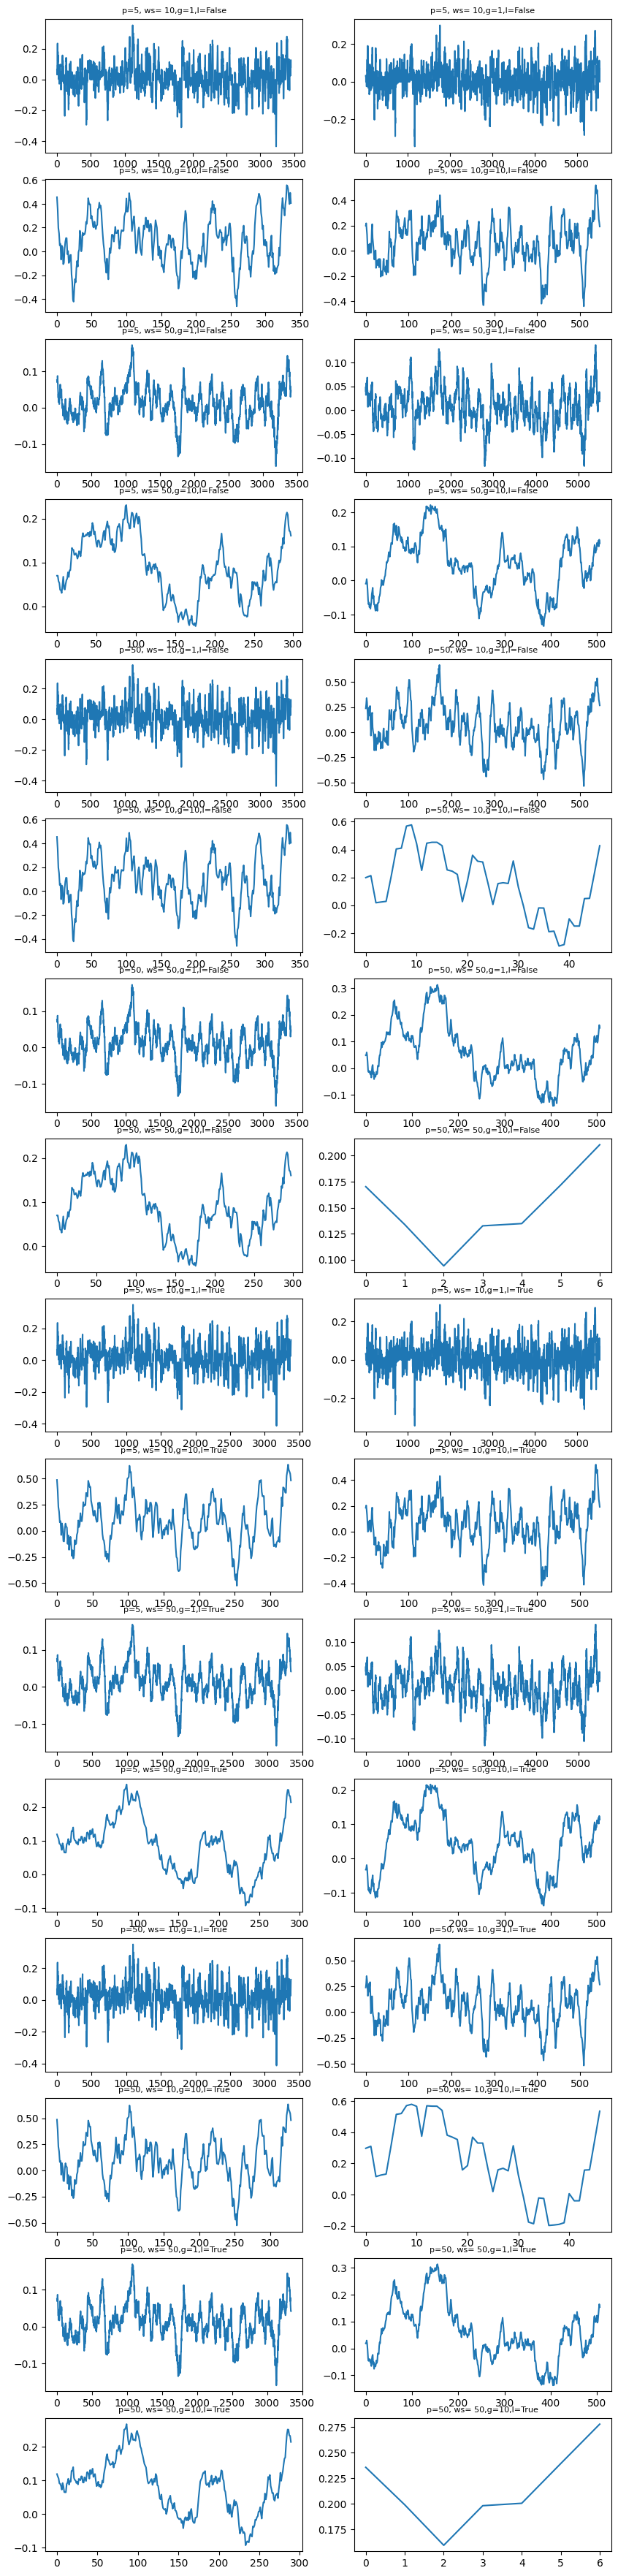

In [10]:
arc_grid_search('Harry Potter and the Sorcerer s Stone_0241527.txt')

step 0 - Sentence completed
step 1 - Sentence completed
step 2 - Sentence completed
step 3 - Sentence completed
step 4 - Sentence completed
step 5 - Sentence completed
step 6 - Sentence completed
step 7 - Sentence completed
step 8 - Sentence completed
step 9 - Sentence completed
step 10 - Sentence completed
step 11 - Sentence completed
step 12 - Sentence completed
step 13 - Sentence completed
step 14 - Sentence completed
step 15 - Sentence completed
step 0 - Words completed
step 1 - Words completed
step 2 - Words completed
step 3 - Words completed
step 4 - Words completed
step 5 - Words completed
step 6 - Words completed
step 7 - Words completed
step 8 - Words completed
step 9 - Words completed
step 10 - Words completed
step 11 - Words completed
step 12 - Words completed
step 13 - Words completed
step 14 - Words completed
step 15 - Words completed


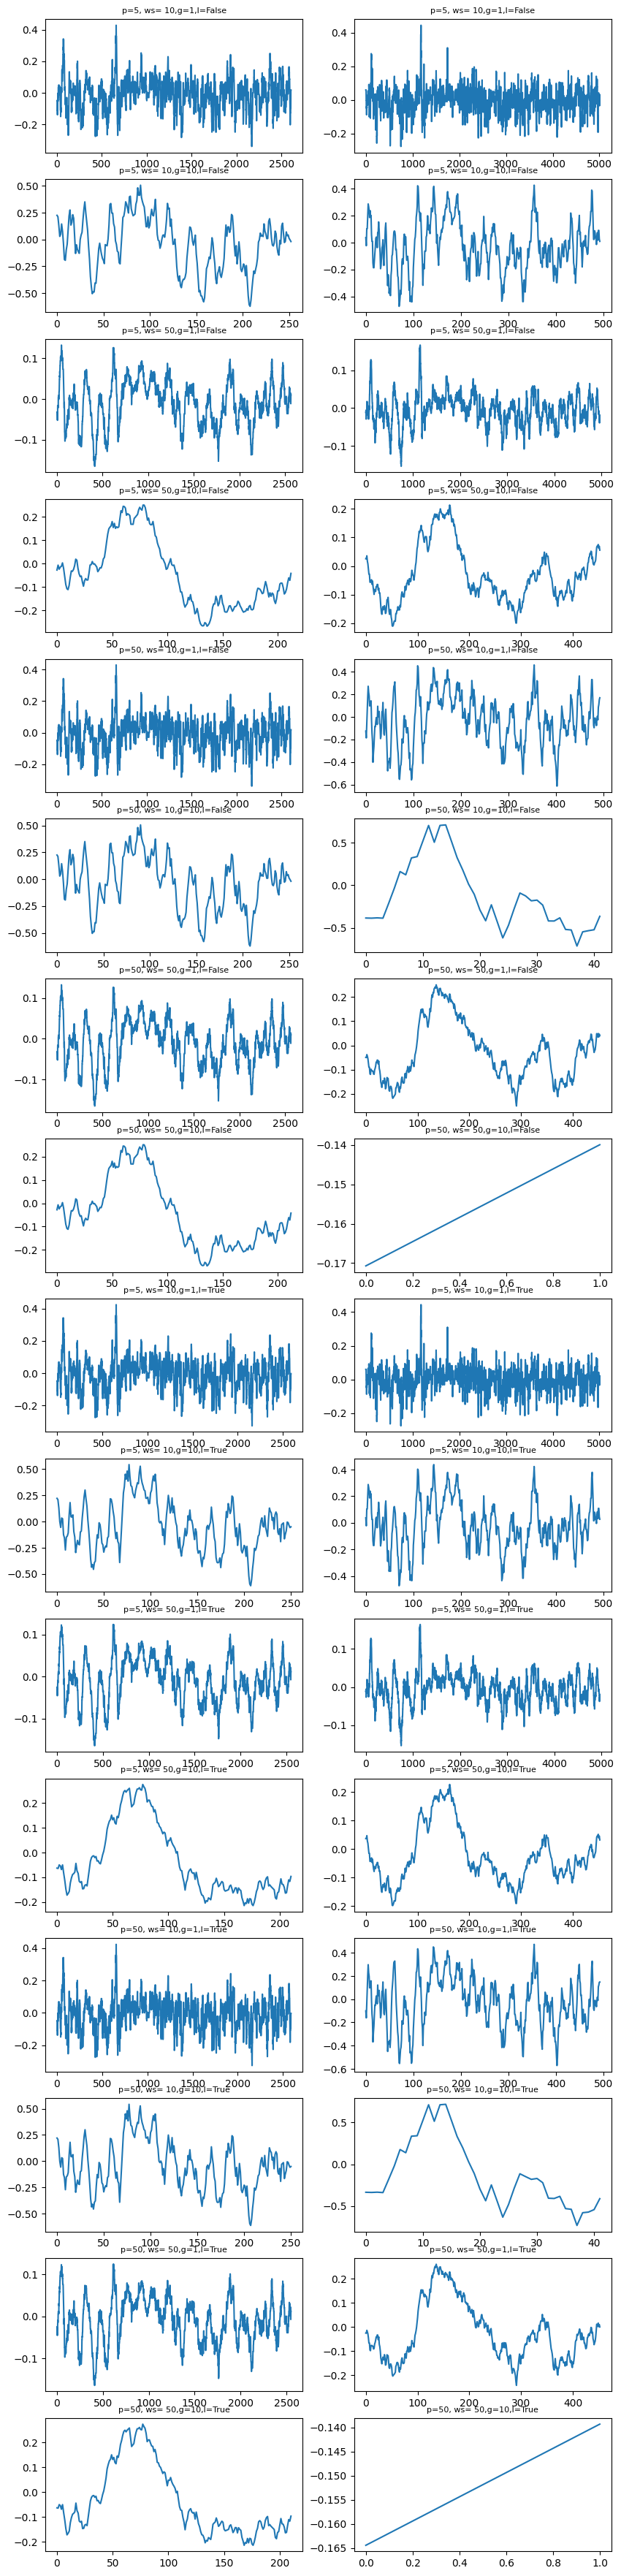

In [11]:
arc_grid_search('Men in Black_0119654.txt')

step 0 - Sentence completed
step 1 - Sentence completed
step 2 - Sentence completed
step 3 - Sentence completed
step 4 - Sentence completed
step 5 - Sentence completed
step 6 - Sentence completed
step 7 - Sentence completed
step 8 - Sentence completed
step 9 - Sentence completed
step 10 - Sentence completed
step 11 - Sentence completed
step 12 - Sentence completed
step 13 - Sentence completed
step 14 - Sentence completed
step 15 - Sentence completed
step 0 - Words completed
step 1 - Words completed
step 2 - Words completed
step 3 - Words completed
step 4 - Words completed
step 5 - Words completed
step 6 - Words completed
step 7 - Words completed
step 8 - Words completed
step 9 - Words completed
step 10 - Words completed
step 11 - Words completed
step 12 - Words completed
step 13 - Words completed
step 14 - Words completed
step 15 - Words completed


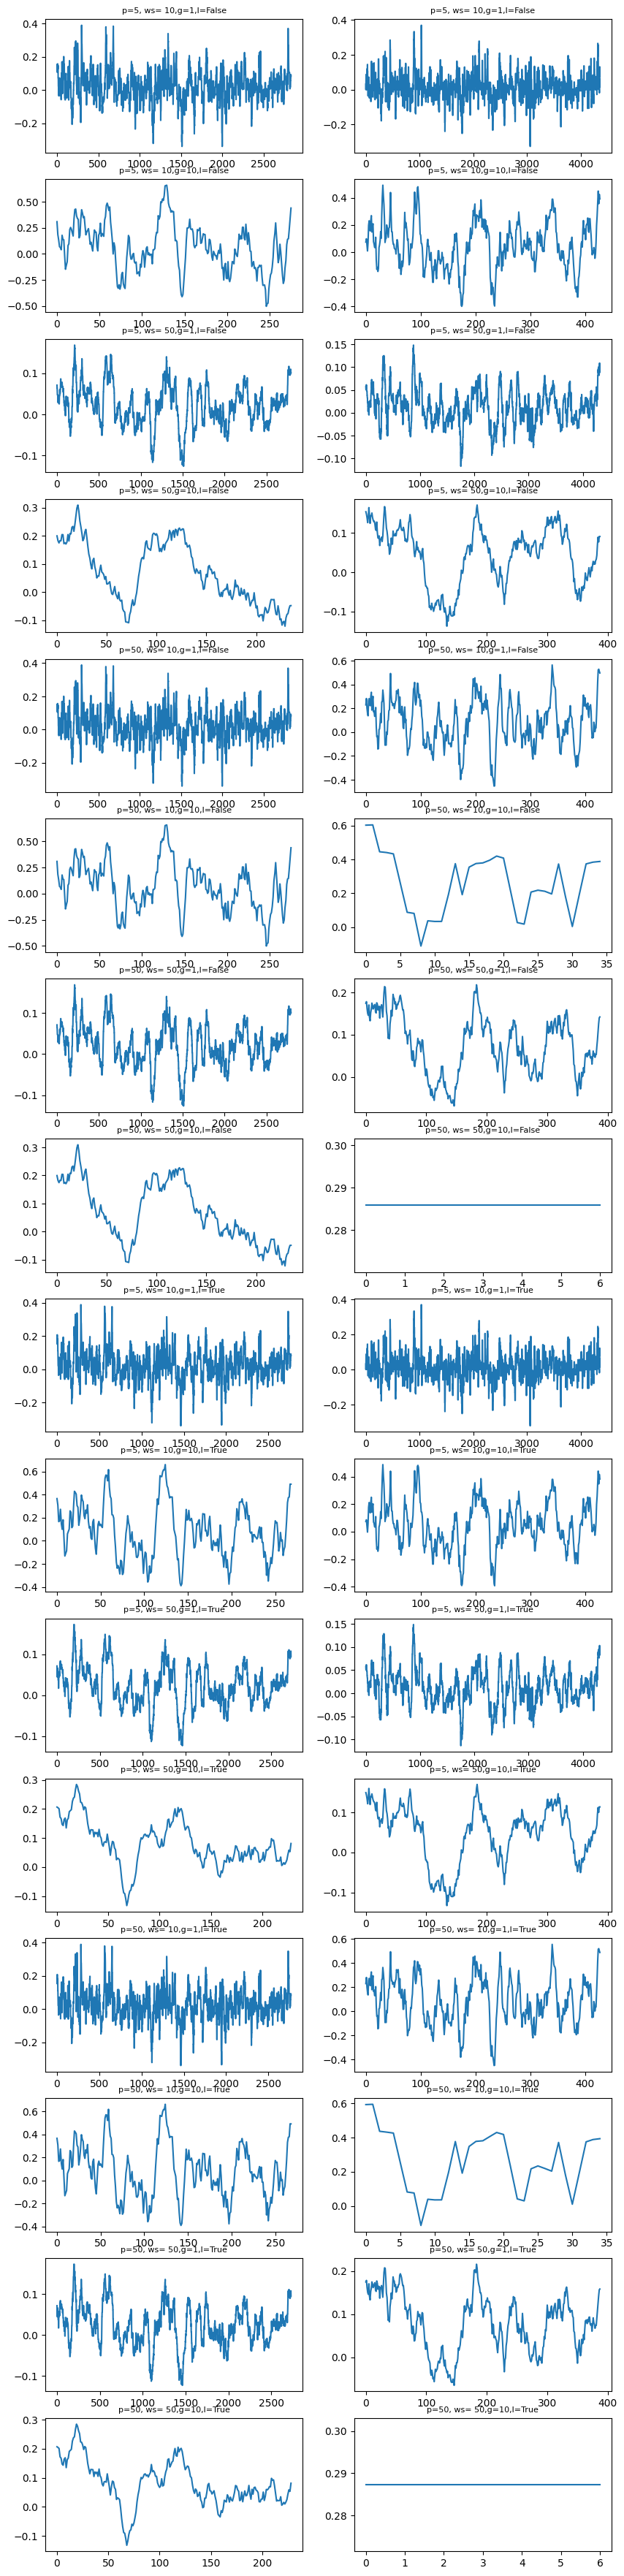

In [12]:
arc_grid_search('Toy Story_0114709.txt')

step 0 - Sentence completed
step 1 - Sentence completed
step 2 - Sentence completed
step 3 - Sentence completed
step 4 - Sentence completed
step 5 - Sentence completed
step 6 - Sentence completed
step 7 - Sentence completed
step 8 - Sentence completed
step 9 - Sentence completed
step 10 - Sentence completed
step 11 - Sentence completed
step 12 - Sentence completed
step 13 - Sentence completed
step 14 - Sentence completed
step 15 - Sentence completed
step 0 - Words completed
step 1 - Words completed
step 2 - Words completed
step 3 - Words completed
step 4 - Words completed
step 5 - Words completed
step 6 - Words completed
step 7 - Words completed
step 8 - Words completed
step 9 - Words completed
step 10 - Words completed
step 11 - Words completed
step 12 - Words completed
step 13 - Words completed
step 14 - Words completed
step 15 - Words completed


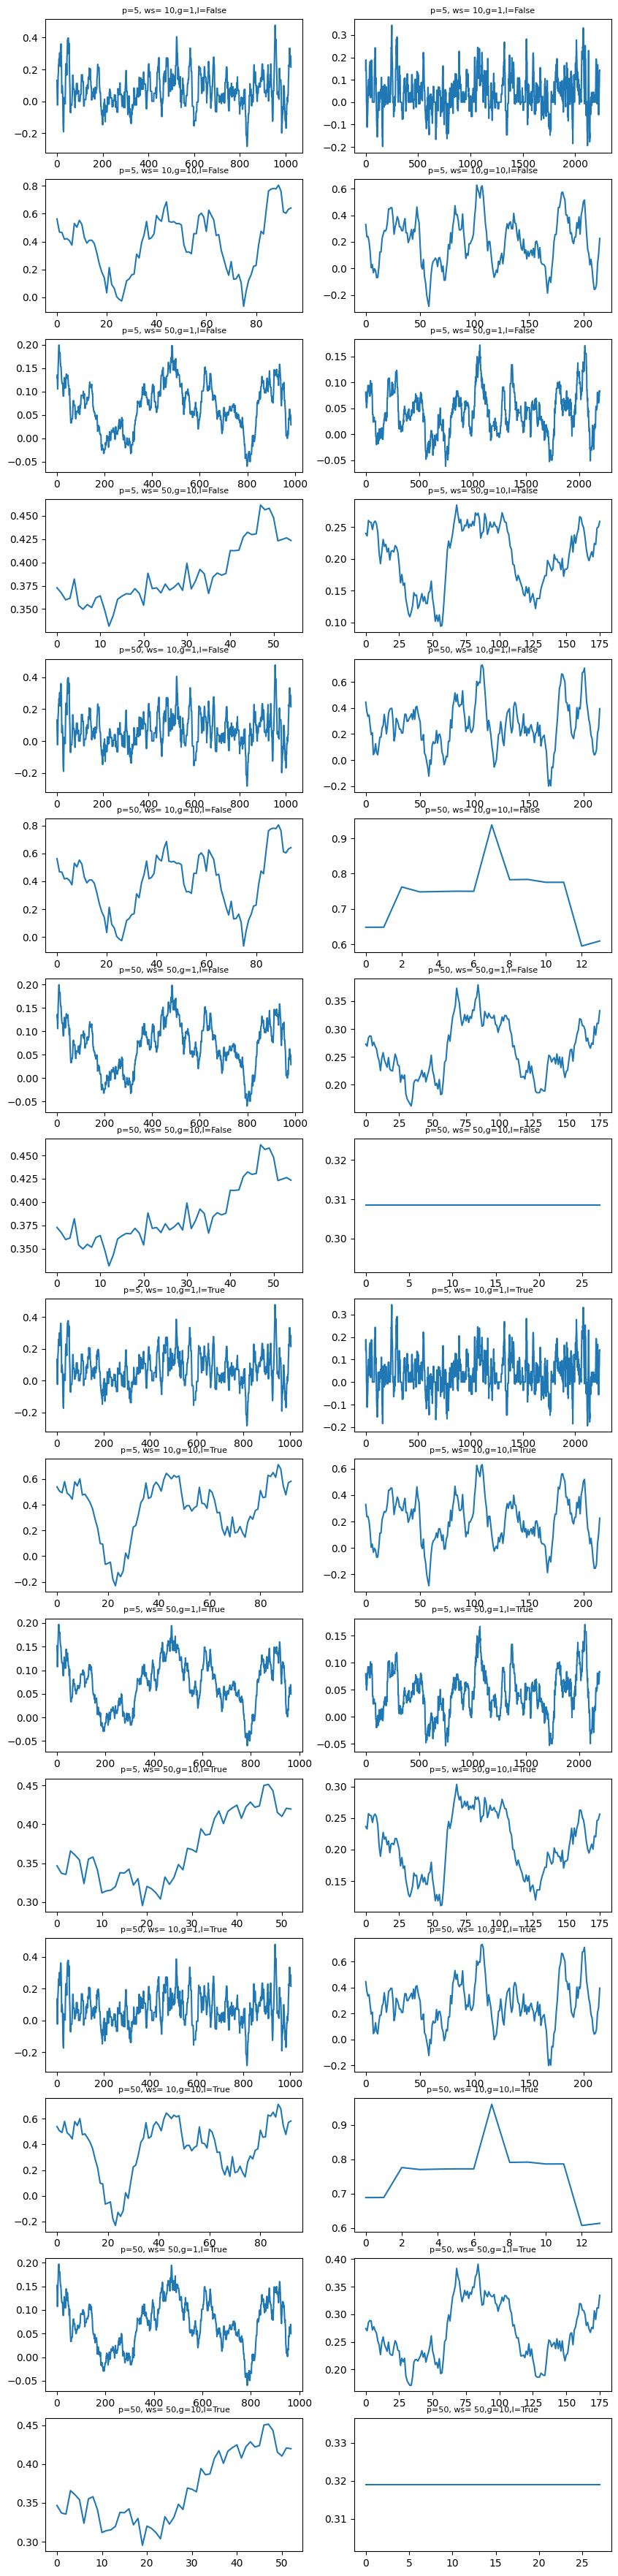

In [13]:
arc_grid_search('Hairspray_0427327.txt')

step 0 - Sentence completed
step 1 - Sentence completed
step 2 - Sentence completed
step 3 - Sentence completed
step 4 - Sentence completed
step 5 - Sentence completed
step 6 - Sentence completed
step 7 - Sentence completed
step 8 - Sentence completed
step 9 - Sentence completed
step 10 - Sentence completed
step 11 - Sentence completed
step 12 - Sentence completed
step 13 - Sentence completed
step 14 - Sentence completed
step 15 - Sentence completed
step 0 - Words completed
step 1 - Words completed
step 2 - Words completed
step 3 - Words completed
step 4 - Words completed
step 5 - Words completed
step 6 - Words completed
step 7 - Words completed
step 8 - Words completed
step 9 - Words completed
step 10 - Words completed
step 11 - Words completed
step 12 - Words completed
step 13 - Words completed
step 14 - Words completed
step 15 - Words completed


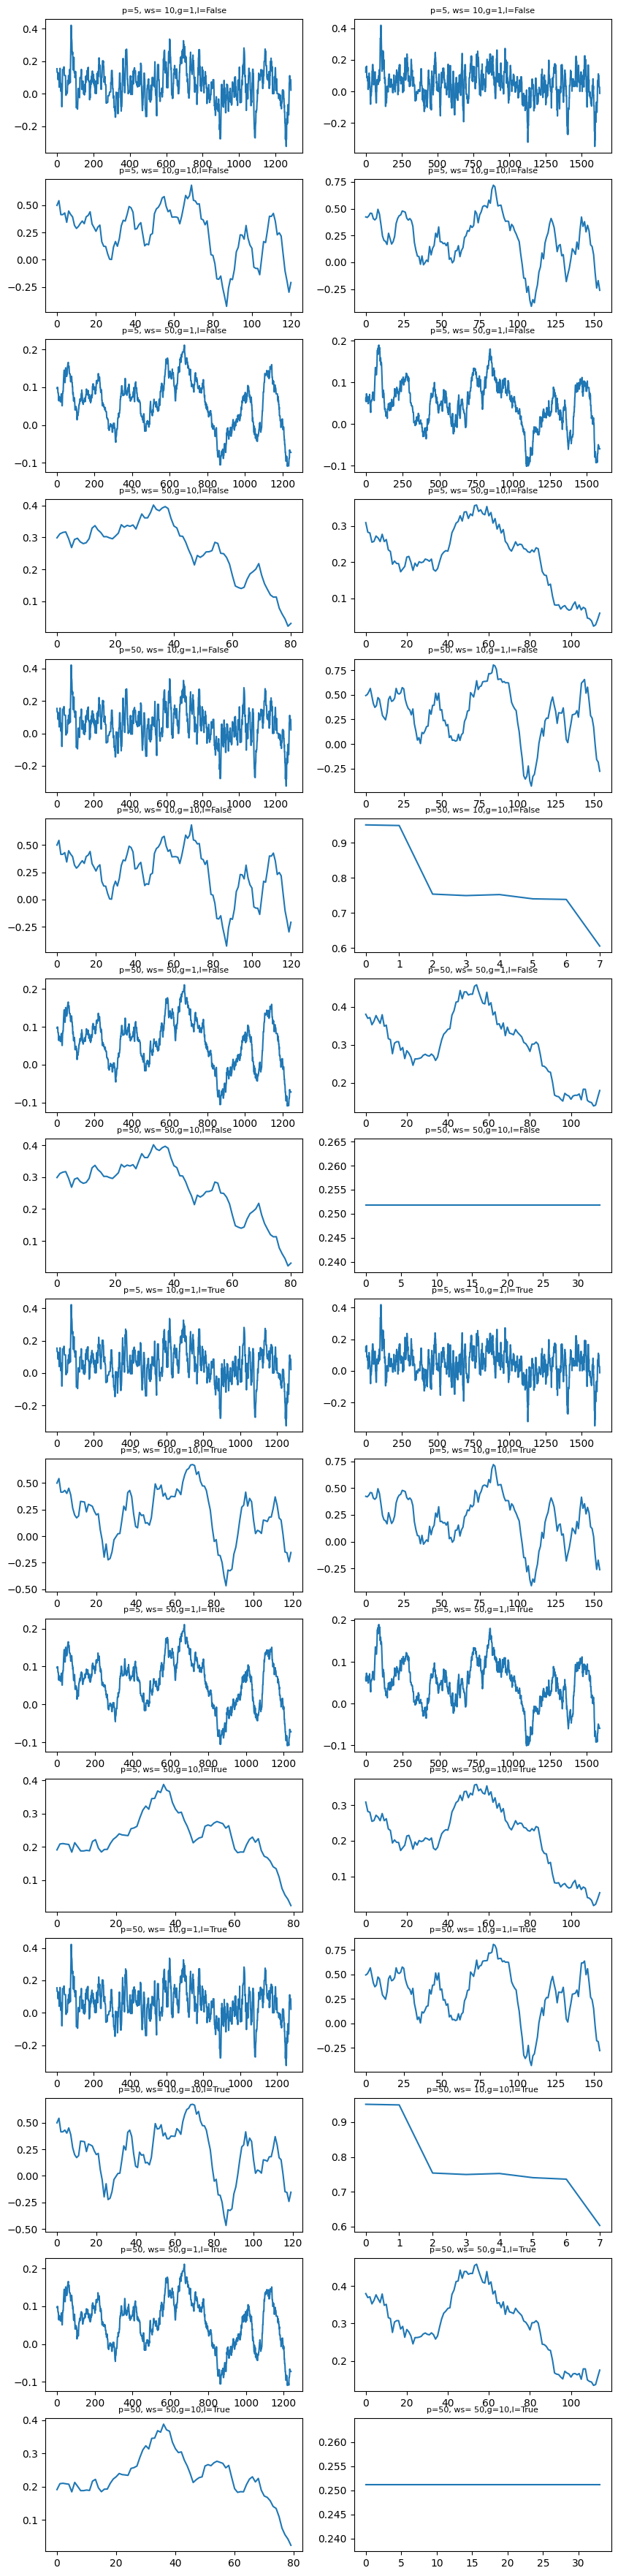

In [14]:
arc_grid_search('Edward Scissorhands_0099487.txt')

step 0 - Sentence completed
step 1 - Sentence completed
step 2 - Sentence completed
step 3 - Sentence completed
step 4 - Sentence completed
step 5 - Sentence completed
step 6 - Sentence completed
step 7 - Sentence completed
step 8 - Sentence completed
step 9 - Sentence completed
step 10 - Sentence completed
step 11 - Sentence completed
step 12 - Sentence completed
step 13 - Sentence completed
step 14 - Sentence completed
step 15 - Sentence completed
step 0 - Words completed
step 1 - Words completed
step 2 - Words completed
step 3 - Words completed
step 4 - Words completed
step 5 - Words completed
step 6 - Words completed
step 7 - Words completed
step 8 - Words completed
step 9 - Words completed
step 10 - Words completed
step 11 - Words completed
step 12 - Words completed
step 13 - Words completed
step 14 - Words completed
step 15 - Words completed


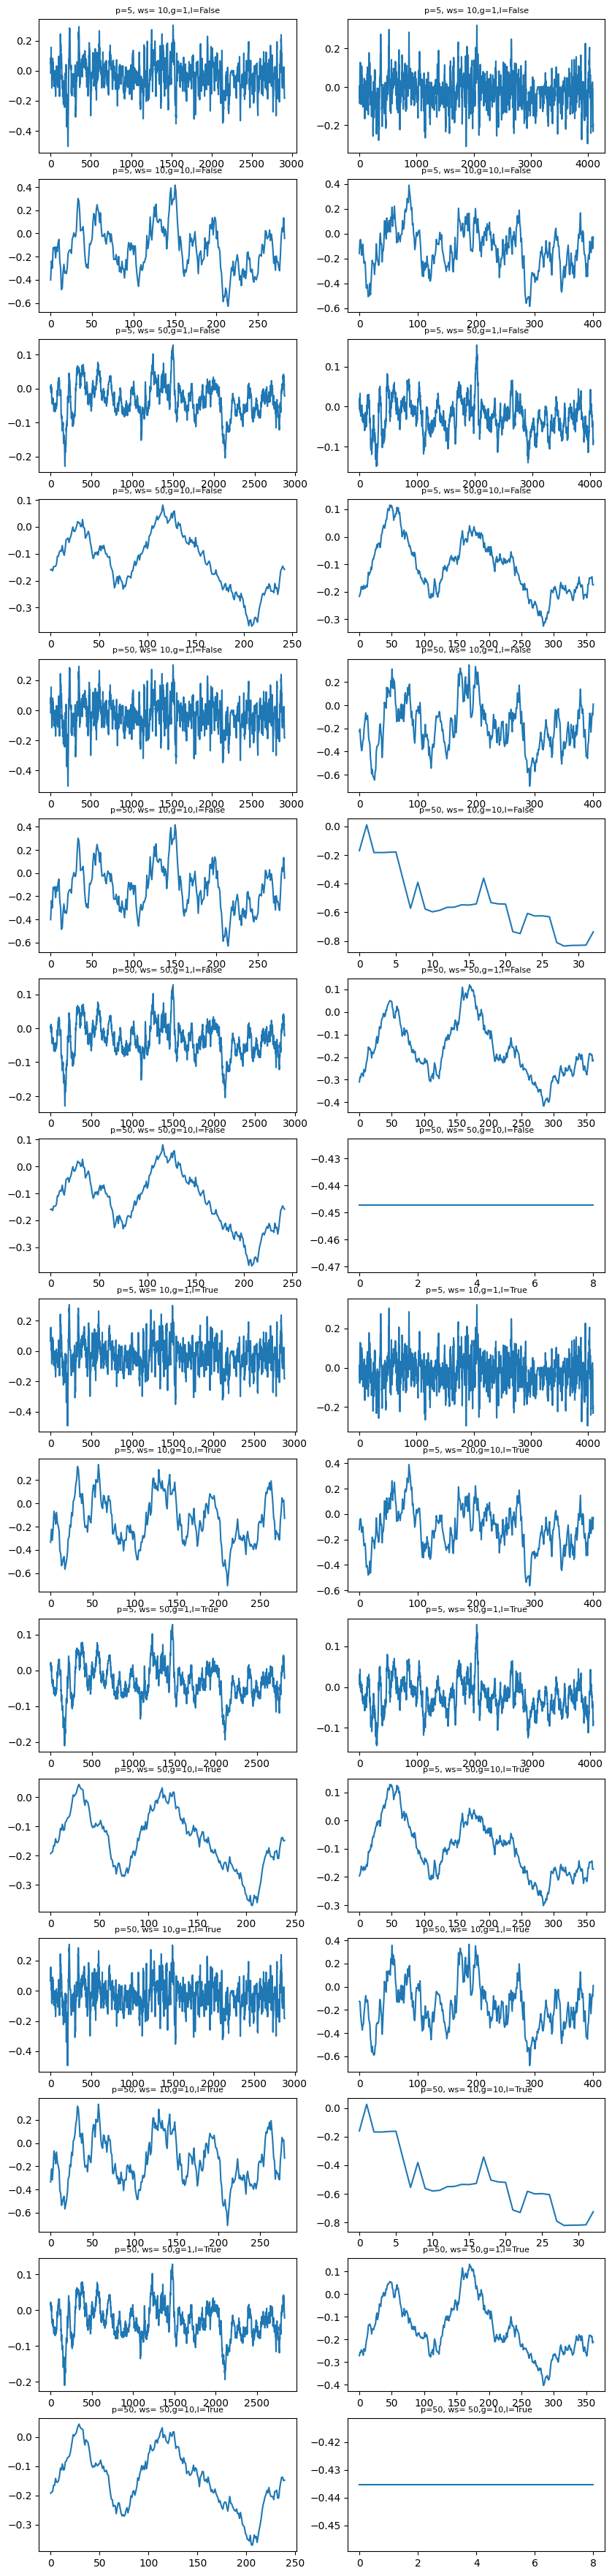

In [15]:
arc_grid_search('Scream 2_0120082.txt')